- ### **model_1 :KNN**
- ### **model_7 : Random_forest**
- ### **model_8 : Random_forest**

---

### **Important Note:**
pipeline_8 = ImbPipeline(steps=[('preprocessing', preproc8), ('smote', SMOTE(random_state=67)),
('classifier', RandomForestClassifier(random_state=67))])
pipeline_8

'''I got an error when I used Pipeline instead of ImbPipeline. The error message states that all 2160 fits 
(model training attempts) failed. It specifically highlights that SMOTE(random_state=67), which is a sampler,
is not compatible within the pipeline because it doesn't implement the fit and transform methods required for
intermediate steps in a pipeline.'''

---

In [1]:

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, recall_score, precision_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # use it when using SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import joblib
import shap
from imblearn.over_sampling import SMOTE

In [4]:
# Load the dataset
heart_data = pd.read_csv('../data/raw/heart.csv')


X =  heart_data.drop(columns = 'HeartDisease')

Y = heart_data['HeartDisease']

numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
string_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X = heart_data.drop(columns = 'HeartDisease')
Y = heart_data['HeartDisease']

In [5]:
np.random.seed(67)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2
                                                    , random_state = 67, stratify = Y)

In [7]:
numeric_features = heart_data.iloc[:,:-1].select_dtypes(include=['float', 'int']).columns
numeric_features = list(numeric_features)
numeric_features

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [8]:
string_features = heart_data.select_dtypes(include=['object']).columns
string_features = list(string_features)

In [9]:
preproc1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), string_features),  # Encoding categorical features
        ('num', StandardScaler(), numeric_features)  # Scaling numerical features (if needed)
    ])
preproc1

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope']),
                                ('num', StandardScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol',
                                  'FastingBS', 'MaxHR', 'Oldpeak'])])

In [10]:
# Set up the ColumnTransformer to handle categorical and numerical features
preproc7 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), string_features),
        ('num', StandardScaler(), numeric_features)
    ])
preproc7

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope']),
                                ('num', StandardScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol',
                                  'FastingBS', 'MaxHR', 'Oldpeak'])])

In [11]:
preproc8 = ColumnTransformer(
    transformers=[('num', Pipeline([('power_transformer', PowerTransformer()),
                                    ('scalar_transformer',StandardScaler())]), numeric_features) ,
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), string_features)
                 ])


preproc8

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('power_transformer',
                                                  PowerTransformer()),
                                                 ('scalar_transformer',
                                                  StandardScaler())]),
                                 ['Age', 'RestingBP', 'Cholesterol',
                                  'FastingBS', 'MaxHR', 'Oldpeak']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope'])])

In [12]:
# Pipeline 1 = preproc1 + baseline

pipeline_1 = Pipeline(steps=[('preprocessing', preproc1), ('clf', KNeighborsClassifier())])
pipeline_1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('clf', KNeighborsClassifier())])

In [18]:
# Create the pipeline that includes preprocessing and classification
pipeline_7 = Pipeline(steps=[
    ('preprocessor', preproc7),
    ('classifier', RandomForestClassifier(random_state=67))  # Include random_state here
])

pipeline_7


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('classifier', RandomForestClassifier(random_state=67))])

In [19]:
pipeline_8 = ImbPipeline(steps=[('preprocessing', preproc8), ('smote', SMOTE(random_state=67)),
('classifier', RandomForestClassifier(random_state=67))])
pipeline_8

'''I got an error when I used Pipeline instead of ImbPipeline. The error message states that all 2160 fits 
(model training attempts) failed. It specifically highlights that SMOTE(random_state=67), which is a sampler,
is not compatible within the pipeline because it doesn't implement the fit and transform methods required for
intermediate steps in a pipeline.'''

"I got an error when I used Pipeline instead of ImbPipeline. The error message states that all 2160 fits \n(model training attempts) failed. It specifically highlights that SMOTE(random_state=67), which is a sampler,\nis not compatible within the pipeline because it doesn't implement the fit and transform methods required for\nintermediate steps in a pipeline."

In [14]:
param_grid_1 = {'clf__n_neighbors': np.arange(2,50,2)}
grid_1 = GridSearchCV(pipeline_1, param_grid_1, cv=5, scoring='accuracy')
grid_1.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'FastingBS',
                                                                          'MaxHR',
                                                                          'Oldpeak'])])),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])},
             scoring='accuracy')

In [21]:
best_k = grid_1.best_params_['clf__n_neighbors']
print("Best number of neighbors (k):", best_k)


Best number of neighbors (k): 8


In [22]:


# Get the best model and evaluate
best_model = grid_1.best_estimator_


# After fitting the model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(Y_train, y_pred_train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate accuracy on the test set
test_accuracy = accuracy_score(Y_test, y_pred_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Training accuracy: 0.8828
Test accuracy: 0.8533


In [23]:
# Define parameter grid for RandomForest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Perform GridSearchCV with the pipeline
grid_7 = GridSearchCV(estimator=pipeline_7, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_7.fit(X_train, Y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'FastingBS',
                                                                          'MaxHR',
                                                                          'Oldpeak'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=67))]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [24]:
from imblearn.pipeline import Pipeline as ImbPipeline  # use it when using SMOTE

# Define parameter grid for RandomForest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Perform GridSearchCV with the pipeline
grid_8 = GridSearchCV(estimator=pipeline_8, param_grid=param_grid, cv=5, scoring='accuracy') # I used ImbPipeline instead Pipeline in pipeline_8


# Fit the model
grid_8.fit(X_train, Y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power_transformer',
                                                                                          PowerTransformer()),
                                                                                         ('scalar_transformer',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'FastingBS',
                                                                          'MaxHR',
                                                                          'Oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'Exe...
                                       ('smote', SMOTE(random_state=67)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=67))]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [25]:
best_model = grid_8.best_estimator_

# After fitting the model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(Y_train, y_pred_train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate accuracy on the test set
test_accuracy = accuracy_score(Y_test, y_pred_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Training accuracy: 0.9877
Test accuracy: 0.8913


In [26]:
best_model_1 = grid_1.best_estimator_
best_model_7 = grid_7.best_estimator_
best_model_8 = grid_8.best_estimator_


In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
# Get the best model from the grid search
estimators = [best_model_1, best_model_7, best_model_8]
labels = ['KNN', 'Randon_forest_7', 'Randon_forest_8']
for i , estimator in enumerate(estimators):
    
    # Make predictions on the training and test sets
    Y_pred_train = estimator.predict(X_train)
    Y_pred_test = estimator.predict(X_test)

    # Calculate performance metrics
    performance_metrics = {
 
        'accuracy_train': accuracy_score(Y_train, Y_pred_train),
        'accuracy_test': accuracy_score(Y_test, Y_pred_test),
        
        'recall_score_train' : recall_score(Y_train, Y_pred_train),
        'recall_score_test' : recall_score(Y_test, Y_pred_test),
        
        'precision_score_train' : precision_score(Y_train, Y_pred_train),
        'precision_score_test' : precision_score(Y_test, Y_pred_test),
     
        'f1_train' : f1_score(Y_train, Y_pred_train),
        'f2_test' : f1_score(Y_test, Y_pred_test),
        
        'confusion_matrix_train' : confusion_matrix(Y_train, Y_pred_train),
        'confusion_matrix_test' : confusion_matrix(Y_test, Y_pred_test)
    }
  
    # Display performance metrics
    print(f"\nPerformance Metrics for the Best {labels[i]} Model :")
    for metric, value in performance_metrics.items():
        print(f"\n{metric}: \n {value}")



Performance Metrics for the Best KNN Model :

accuracy_train: 
 0.8828337874659401

accuracy_test: 
 0.8532608695652174

recall_score_train: 
 0.8990147783251231

recall_score_test: 
 0.8431372549019608

precision_score_train: 
 0.8902439024390244

precision_score_test: 
 0.8865979381443299

f1_train: 
 0.8946078431372549

f2_test: 
 0.864321608040201

confusion_matrix_train: 
 [[283  45]
 [ 41 365]]

confusion_matrix_test: 
 [[71 11]
 [16 86]]

Performance Metrics for the Best Randon_forest_7 Model :

accuracy_train: 
 0.9877384196185286

accuracy_test: 
 0.8913043478260869

recall_score_train: 
 0.9950738916256158

recall_score_test: 
 0.8921568627450981

precision_score_train: 
 0.9829683698296837

precision_score_test: 
 0.91

f1_train: 
 0.988984088127295

f2_test: 
 0.900990099009901

confusion_matrix_train: 
 [[321   7]
 [  2 404]]

confusion_matrix_test: 
 [[73  9]
 [11 91]]

Performance Metrics for the Best Randon_forest_8 Model :

accuracy_train: 
 0.9877384196185286

accura


Training AUC for model KNN: 0.95
Testing AUC for model KNN: 0.94


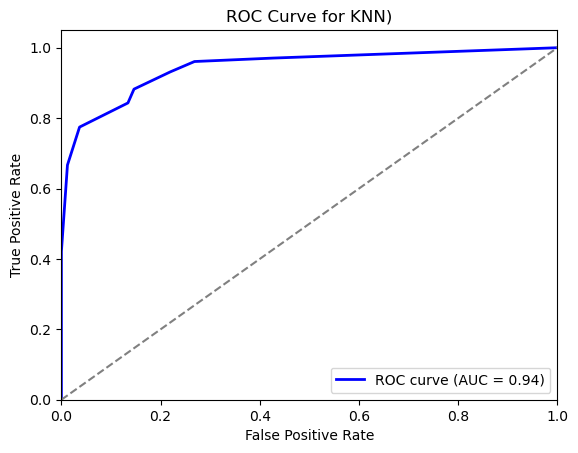


Training AUC for model Randon_forest_7: 1.00
Testing AUC for model Randon_forest_7: 0.95


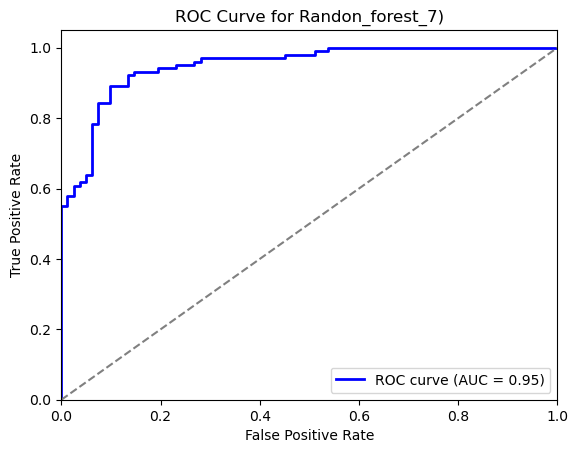


Training AUC for model Randon_forest_8: 1.00
Testing AUC for model Randon_forest_8: 0.95


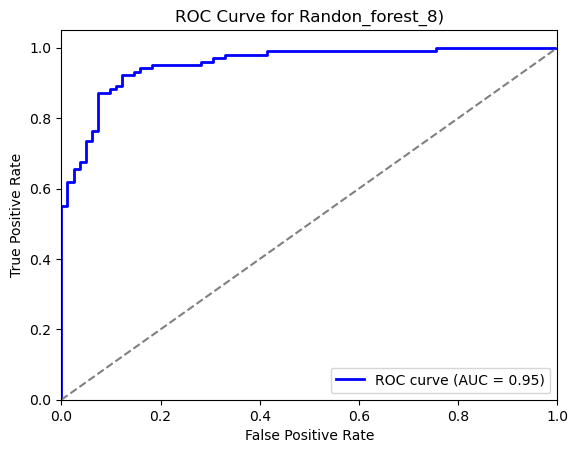

In [30]:
import matplotlib.pyplot as plt
best_model_1 = grid_1.best_estimator_
best_model_7 = grid_7.best_estimator_
best_model_8 = grid_8.best_estimator_

estimators = [best_model_1, best_model_7, best_model_8]
labels = ['KNN', 'Randon_forest_7', 'Randon_forest_8']

for i , estimator in enumerate(estimators):

    Y_train_prob = estimator.predict_proba(X_train)[:, 1]  # Probability of the positive class
    Y_test_prob = estimator.predict_proba(X_test)[:, 1]    # Probability of the positive class

    # Calculate AUC-ROC score
    train_auc = roc_auc_score(Y_train, Y_train_prob)
    test_auc = roc_auc_score(Y_test, Y_test_prob)

    print(f"\nTraining AUC for model {labels[i]}: {train_auc:.2f}")
    print(f"Testing AUC for model {labels[i]}: {test_auc:.2f}")
    
    
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {labels[i]})')
    plt.legend(loc="lower right")
    plt.show()

### **Identifying the best model based on accuracy score**

In [34]:
# Get the best model from the grid search
scores = []

estimators = [grid_1.best_estimator_, grid_7.best_estimator_,  grid_8.best_estimator_]
labels = ['KNN', 'Randon_forest_7', 'Randon_forest_8']
for i , estimator in enumerate(estimators):
    
    # Make predictions on the training and test sets
    Y_pred_train = estimator.predict(X_train)
    Y_pred_test = estimator.predict(X_test)

    # Calculate performance metrics
    performance_metrics = {
 
        'accuracy_train': accuracy_score(Y_train, Y_pred_train),
        'accuracy_test': accuracy_score(Y_test, Y_pred_test),
        
        
    }
    scores.append([accuracy_score(Y_test, Y_pred_test), labels[i], estimator])
  
    # Display performance metrics
    print(f"\nPerformance Metrics for {labels[i]} Model :")
    for metric, value in performance_metrics.items():
        print(f"\n{metric}: \n {value}")



Performance Metrics for KNN Model :

accuracy_train: 
 0.8828337874659401

accuracy_test: 
 0.8532608695652174

Performance Metrics for Randon_forest_7 Model :

accuracy_train: 
 0.9877384196185286

accuracy_test: 
 0.8913043478260869

Performance Metrics for Randon_forest_8 Model :

accuracy_train: 
 0.9877384196185286

accuracy_test: 
 0.8913043478260869


## **Explanation**

In [43]:
import shap

# Load the saved best performing model 
loaded_model = joblib.load('C:/Users/user/Documents/DSI/TEAM_PROJECT/models/best_model_between_1_and_7.pkl')

data_transform = loaded_model.named_steps['preprocessor'].transform(X_test) # for model 1-6 it was  'preprocessing'

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(
    model=loaded_model.named_steps['classifier'].predict, # for model 1-6 it was  preprocessing 'clf'
    data=data_transform  
)

# Compute SHAP values for the transformed test data
shap_values = explainer.shap_values(data_transform)

# Extract feature names from the preprocessing step
feature_names = loaded_model.named_steps['preprocessor'].get_feature_names_out()


Using 230 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/230 [00:00<?, ?it/s]

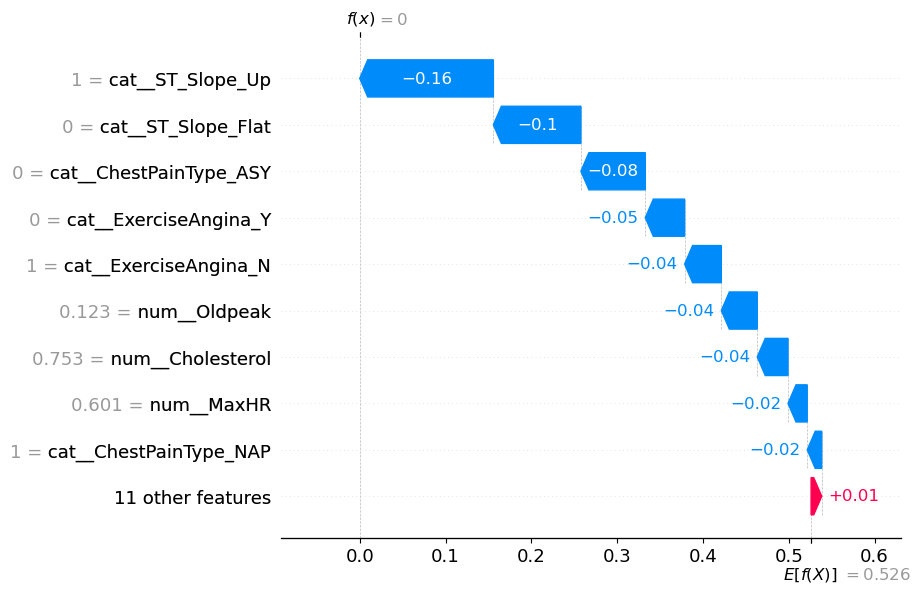

In [44]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values[1], 
    base_values=explainer.expected_value, 
    data=data_transform[1], 
    feature_names=feature_names
    ))

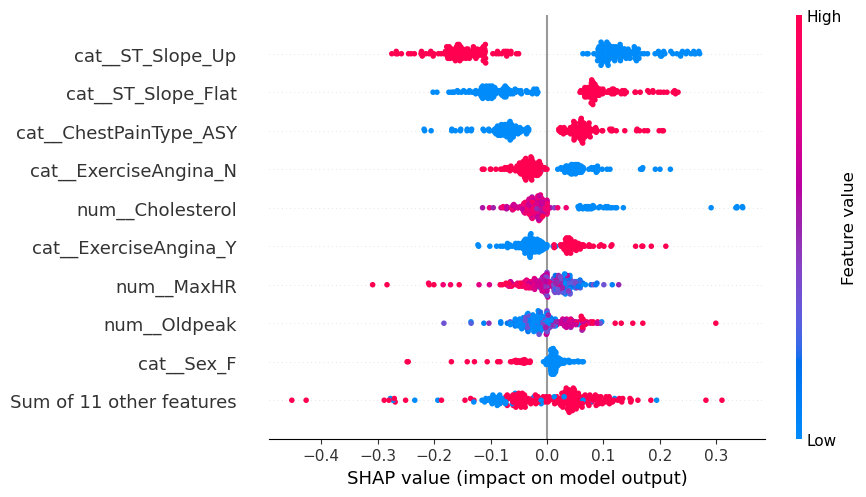

In [45]:
shap.plots.beeswarm(shap.Explanation(values=shap_values, 
                               base_values=explainer.expected_value, 
                               data=data_transform, 
                               feature_names=feature_names))

### **SHAP for only random sample of 100**

In [49]:
import shap
import joblib
import pandas as pd

# Load the saved best-performing model
loaded_model = joblib.load('C:/Users/user/Documents/DSI/TEAM_PROJECT/models/best_model_between_1_and_2.pkl')

# Sample 50 instances from the test set
X_test_sample = X_test.sample(100, random_state=67)

# Apply the preprocessing transformation to the sample
data_transform = loaded_model.named_steps['preprocessing'].transform(X_test_sample)

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(
    model=loaded_model.named_steps['clf'].predict, 
    data=data_transform
)

# Compute SHAP values for the transformed sample
shap_values = explainer.shap_values(data_transform)

# Extract feature names from the preprocessing step
feature_names = loaded_model.named_steps['preprocessing'].get_feature_names_out()

# Convert SHAP values to a DataFrame for better readability (optional)
shap_df = pd.DataFrame(shap_values, columns=feature_names)
print(shap_df)
#shap_df


  0%|          | 0/100 [00:00<?, ?it/s]

    num__Age  num__RestingBP  num__Cholesterol  num__FastingBS  num__MaxHR  \
0   0.014617        0.008122         -0.005710        0.060123    0.050333   
1   0.007734        0.014471         -0.028722       -0.041085   -0.055331   
2   0.011920        0.002428         -0.006046       -0.007845    0.036302   
3   0.025174        0.013926          0.066838       -0.004870    0.107781   
4  -0.010416       -0.015727         -0.056278       -0.072918   -0.041773   
..       ...             ...               ...             ...         ...   
95 -0.043104        0.005479         -0.055875       -0.042645    0.105785   
96  0.013068       -0.006225         -0.007054        0.190690    0.106616   
97 -0.017710       -0.019156          0.113293        0.150059    0.086867   
98 -0.028270       -0.014305         -0.039067       -0.038722   -0.033784   
99 -0.042821        0.010504         -0.031289       -0.045005   -0.004214   

    num__Oldpeak  cat__Sex_F  cat__Sex_M  cat__ChestPainType_AS

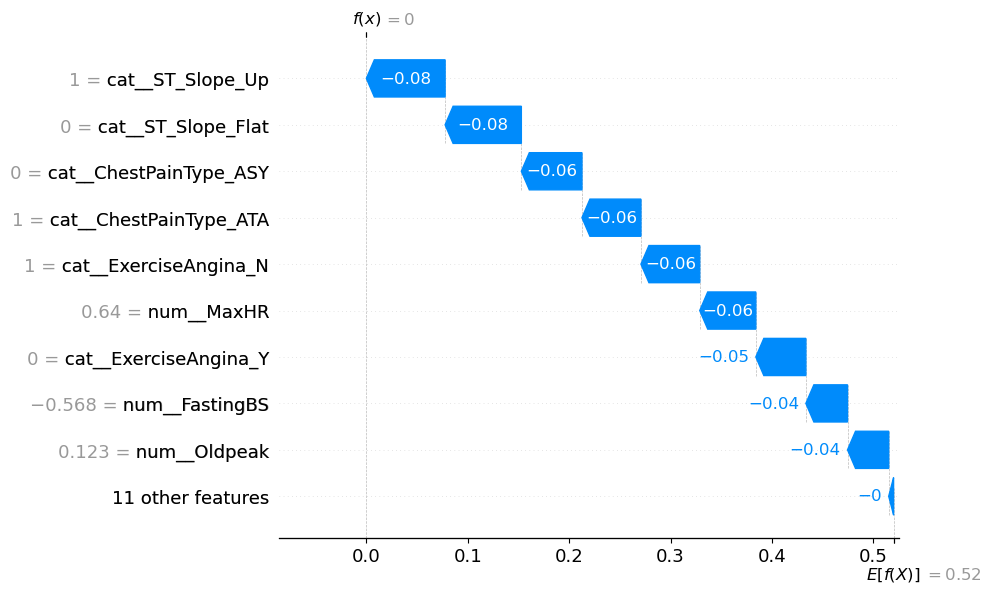

<module 'shap' from 'c:\\Users\\user\\miniconda3\\Lib\\site-packages\\shap\\__init__.py'>

In [50]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values[1], 
    base_values=explainer.expected_value, 
    data=data_transform[1], 
    feature_names=feature_names
    ))
shap

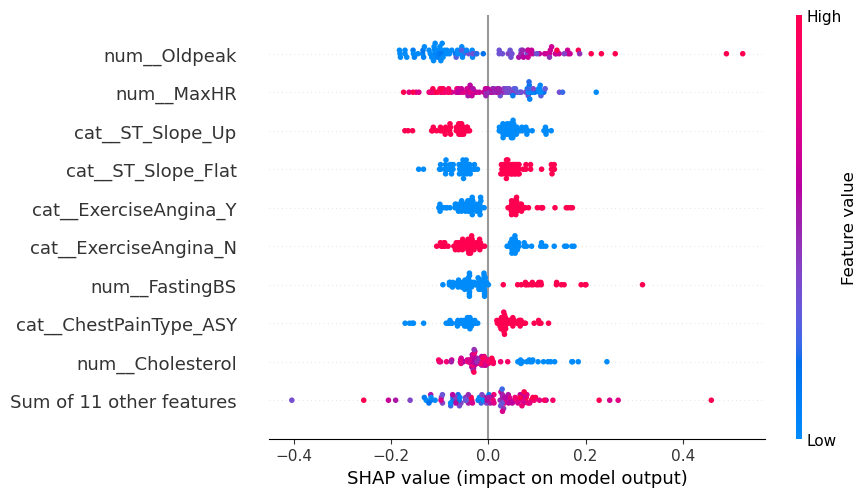

In [51]:
shap.plots.beeswarm(shap.Explanation(values=shap_values, 
                               base_values=explainer.expected_value, 
                               data=data_transform, 
                               feature_names=feature_names))